In [3]:
#sort algoritm
def partition(nums, low, high):  
    # Выбираем средний элемент в качестве опорного
    # Также возможен выбор первого, последнего
    # или произвольного элементов в качестве опорного
    pivot = nums[(low + high) // 2]
    i = low - 1
    j = high + 1
    while True:
        i += 1
        while nums[i] < pivot:
            i += 1

        j -= 1
        while nums[j] > pivot:
            j -= 1

        if i >= j:
            return j

        # Если элемент с индексом i (слева от опорного) больше, чем
        # элемент с индексом j (справа от опорного), меняем их местами
        nums[i], nums[j] = nums[j], nums[i]

def quick_sort(nums):  
    # Создадим вспомогательную функцию, которая вызывается рекурсивно
    def _quick_sort(items, low, high):
        if low < high:
            # This is the index after the pivot, where our lists are split
            split_index = partition(items, low, high)
            _quick_sort(items, low, split_index)
            _quick_sort(items, split_index + 1, high)

    _quick_sort(nums, 0, len(nums) - 1)

# Проверяем, что оно работает
random_list_of_nums = [4, 5, 3, 4, 5, 5]  
quick_sort(random_list_of_nums)  
print(random_list_of_nums) 

[3, 4, 4, 5, 5, 5]


In [16]:
#moda
l = [4, 5, 3, 4, 2, 5, 5]
repeticiones = 0                                                                         
for i in l:                                                                              
    apariciones = l.count(i)                                                             
    if apariciones > repeticiones:                                                       
        repeticiones = apariciones                                                       
                                                                                         
modas = []                                                                               
for i in l:                                                                              
    apariciones = l.count(i)                                                             
    if apariciones == repeticiones and i not in modas:                                   
        modas.append(i)                                                                  
                                                                                         
print("moda:", modas)  

moda: [5]


In [30]:
#median
l = [4, 5, 3, 4, 2, 5, 5]
l = sorted(l)
if len(l) % 2 == 0:
    mean_index_1 = int(len(l) / 2)
    mean_index_2 = int((len(l)/2) + 1)
    mean = (l[mean_index_1-1] + l[mean_index_2-1])/2
elif len(l)%2 != 0:
    mean_index = int((len(l)+1)/2)
    mean = l[mean_index-1]
print(mean)

4


In [31]:
from statistics import mean, median
print(median(l))
print(mean(l))

4
4


В таблице представлен ряд данных о весе 20 случайно выбранных клиентов медицинской клиники — 10 мужчин и 10 женщин (в кг).

In [32]:
import pandas as pd

df = pd.DataFrame({
    'mens': [80.2, 80.8, 57.5, 98, 50.5, 73.8, 77.4, 59.7, 77.9, 52.6],
    'womens': [57.9, 57.3, 72.8, 48.2, 59.5, 48.3, 61.2, 53.9, 53.9, 70.7]
})

In [34]:
print(df['mens'].mean())
print(df['womens'].mean())
print(df['mens'].mean() - df['womens'].mean())

70.84
58.370000000000005
12.469999999999999


In [35]:
first_array = [2,7,4,3,6,4,1,2]
second_array = [5,2,4,8,1,6,7]

In [36]:
median(first_array)

3.5

In [37]:
median(second_array)

5

In [38]:
print(df['mens'].median())
print(df['womens'].median())

75.6
57.599999999999994


In [41]:
patients = pd.DataFrame()
patients['patients'] = pd.concat([df['mens'], df['womens']], ignore_index=True, axis=0)
patients['patients'].median()

59.6

In [42]:
#Looking for cvartil

In [58]:
def custom_median(l):
    l = sorted(l)
    mediana = 0
    if len(l)%2 == 0:
        mean_index_1 = int(len(l) / 2) - 1
        mean_index_2 = int((len(l)/2) + 1) - 1
        mediana = (l[mean_index_1] + l[mean_index_2])/2
    else:
        mean_index = mean_index = int((len(l)+1)/2) - 1
        mediana = l[mean_index]
    return mediana

def custom_quantile(l):
    l = sorted(l)
    q2 = custom_median(l)
    left_av_50 = []
    right_av_50 = []
    for i in l:
        if i >= q2:
            right_av_50.append(i)
        elif i < q2:
            left_av_50.append(i)
    q1 = custom_median(left_av_50)
    q3 = custom_median(right_av_50)
    return q1, q2, q3

In [59]:
l1 = [2,7,4,3,6,4,1,2]
l2 = [5,2,4,8,1,6,7]
l1_cvactil = custom_quantile(l1)
l2_cvartil = custom_quantile(l2)
print(l1_cvactil)
print(l2_cvartil)

(2.0, 3.5, 5.0)
(2, 5, 6.5)


Вычисляем квартили в Python
Для вычисления квартилей в pandas используется функция quantile(). Она возвращает значение в заданном квартиле. Значение квартиля задается в диапазоне от [0,...1]. Например, для нижнего квартиля это значение равно Q1 = 0.25, для верхнего — Q3 = 0.75.

Также у quantile()  существует необязательный параметр, который  указывает метод интерполяции, который нужно использовать, когда требуемый квантиль лежит между двумя точками данных. По умолчанию используется линейная интерполяция.

In [61]:
df_l_1 = pd.DataFrame({
    'l1': [2,7,4,3,6,4,1,2],
})
df_l_2 = pd.DataFrame({
    'l2': [5,2,4,8,1,6,7],
})

In [63]:
df_l_1.quantile(q=0.5, axis=0, numeric_only=True, 
                interpolation='linear')

l1    3.5
Name: 0.5, dtype: float64

In [64]:
df_l_2.quantile(q=0.5, axis=0, numeric_only=True, 
                interpolation='linear')

l2    5.0
Name: 0.5, dtype: float64

In [65]:
df_l_1.quantile(q=0.5, axis=0, numeric_only=True, 
                interpolation='midpoint')

l1    3.5
Name: 0.5, dtype: float64

In [66]:
df_l_2.quantile(q=0.5, axis=0, numeric_only=True, 
                interpolation='midpoint')

l2    5.0
Name: 0.5, dtype: float64

Найдите Q1 и Q3 для мужчин и женщин, используя Python (выпишите результат, округляя до 1 знака после точки-разделителя):

In [74]:
df = pd.DataFrame({
    'mens': [80, 80.8, 57.5, 98, 50.5, 73.8, 77.4, 59.7, 77.9, 52.6],
    'womens': [57.9, 57.3, 72.8, 48.2, 59.5, 48.3, 61.2, 53.9, 53.9, 70.7]
})

In [75]:
df['mens'].quantile(q=0.25, interpolation='midpoint')

58.6

In [76]:
round(df['mens'].quantile(q=0.75, interpolation='midpoint'),1)

79.0

In [77]:
df['womens'].quantile(q=0.25, interpolation='midpoint')

53.9

In [78]:
round(df['womens'].quantile(q=0.75, interpolation='midpoint'),1)

60.4

Найдите размах и межквартильный размах для веса на выборке пациентов клиники.

In [87]:
df = pd.DataFrame({
    'mens': [80.2, 80.8, 57.5, 98, 50.5, 73.8, 77.4, 59.7, 77.9, 52.6],
    'womens': [57.9, 57.3, 72.8, 48.2, 59.5, 48.3, 61.2, 53.9, 53.9, 70.7]
})

###### Размах для мужчин

In [88]:
mens_range = df['mens'].max() - df['mens'].min()
print(mens_range)

47.5


In [89]:
mens_iqr = df['mens'].quantile(q=0.75, interpolation='midpoint') - df['mens'].quantile(q=0.25, interpolation='midpoint')
print(round(mens_iqr,1))

20.5


###### Размах для женщин

In [90]:
womens_range = df['womens'].max() - df['womens'].min()
print(round(womens_range,1))

24.6


In [91]:
womens_iqr = df['womens'].quantile(q=0.75, interpolation='midpoint') - df['womens'].quantile(q=0.25, interpolation='midpoint')
print(round(womens_iqr,1))

6.5


#### Вычисляем стандартное отклонение в Python

Для вычисления стандартного отклонения в выборке в Python используется функция std(). Единственным аргументом функции является диапазон данных. В данном случае диапазоном данных может выступать как серия pandas, так и весь датафрейм целиком. Aналогично для вычисления дисперсии используется функция var().

In [92]:
mens_std = df['mens'].std()
print(round(mens_std, 1))

15.2


In [93]:
mens_var = df['mens'].var()
print(round(mens_var, 1))

230.5


In [94]:
womens_std = df['womens'].std()
print(round(womens_std, 1))

8.3


In [95]:
womens_var = df['womens'].var()
print(round(womens_var, 1))

68.4


Проверяем наличие выбросов в выборке пациентов клиники:

In [96]:
mens_iqr = df['mens'].quantile(q=0.75, interpolation='midpoint') - df['mens'].quantile(q=0.25, interpolation='midpoint')
mens_q1 = df['mens'].quantile(q=0.25, interpolation='midpoint')
mens_q3 = df['mens'].quantile(q=0.75, interpolation='midpoint')
mens_outlier = df[(df['mens'] < mens_q1 - (1.5 * mens_iqr)) |
                  (df['mens'] > mens_q3 + (1.5 * mens_iqr))]
mens_outlier

,mens,womens


In [100]:
womens_iqr = df['womens'].quantile(q=0.75, interpolation='midpoint') - df['mens'].quantile(q=0.25, interpolation='midpoint')
womens_q1 = df['womens'].quantile(q=0.25, interpolation='midpoint')
womens_q3 = df['womens'].quantile(q=0.75, interpolation='midpoint')
womens_outlier = df[(df['womens'] < womens_q1 - (1.5 * womens_iqr)) |
                  (df['womens'] > womens_q3 + (1.5 * womens_iqr))]
womens_outlier['womens']

2    72.8
3    48.2
5    48.3
9    70.7
Name: womens, dtype: float64

Таблица показывает среднюю температуру в январе (в градусах по Цельсию) в одном российском городе за 2007-2018 годы:

In [101]:
df = pd.DataFrame({
    'year': [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018],
    'temp': [-4.7, -6.1, -5.5, -3.3, -7.1, -3.1, -5.2, -7.3, -12.1, -6.6, -5.9, -6.3]
})

In [103]:
#mean
round(df['temp'].mean(),1)

-6.1

In [104]:
#median
round(df['temp'].median(),1)

-6.0

In [105]:
#std
round(df['temp'].std(),1)

2.3

In [106]:
#range
round(df['temp'].max() - df['temp'].min(), 1)

9.0

In [107]:
#q range
round(df['temp'].quantile(q=0.75, interpolation='midpoint') - df['temp'].quantile(q=0.25, interpolation='midpoint'), 1)

1.9

In [109]:
#outlier
temp_iqr = df['temp'].quantile(q=0.75, interpolation='midpoint') - df['temp'].quantile(q=0.25, interpolation='midpoint')
temp_q1 = df['temp'].quantile(q=0.25, interpolation='midpoint')
temp_q3 = df['temp'].quantile(q=0.75, interpolation='midpoint')
temp_outlier = df[(df['temp'] < temp_q1 - (1.5 * temp_iqr)) |
                  (df['temp'] > temp_q3 + (1.5 * temp_iqr))]
temp_outlier

,year,temp
8,2015,-12.1


Boxplot показывает пять важных характеристических значений для набора данных:

- Минимум Xmin.
- Нижний квартиль Q1.
- Медиана Q2.
- Верхний квартиль Q3.
- Максимум Xmax.

Данные о расходах на мобильную связь 20 пользователей в городе А и 20 пользователей в городе Б.

In [115]:
import matplotlib.pyplot as plt
df = pd.DataFrame({
    'city_a': [240, 440, 455, 475, 475, 490, 490, 500, 500, 500, 530, 550, 578, 580, 620, 687, 694, 703, 859],
    'city_b': [500, 564, 590, 600, 600, 600, 645, 650, 660, 667, 689, 692, 700, 700, 705, 735, 760, 764, 805]
})

Для каждого столбца в фрейме данных можно создать boxplots — df.boxplot(), указав используемые столбцы:

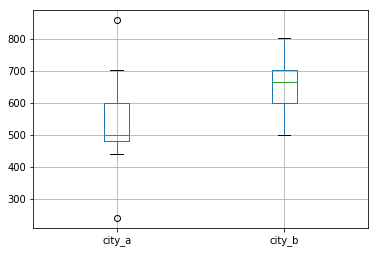

In [122]:
boxplot = df.boxplot(column=['city_a', 'city_b'])

In [124]:
data = pd.DataFrame({
  'value': [48, 44, 42.5, 40.5, 40.5, 39, 39, 38, 38, 38, 35, 33, 30.2, 30, 26, 19.3, 27, 21]
})

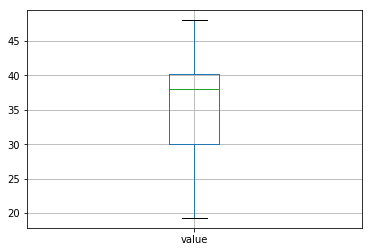

In [125]:
boxplot = data.boxplot(column=['value'])

In [126]:
data.median(axis=0)

value    38.0
dtype: float64

В таблице ниже приведены данные о двух группах пользователей определенного сервиса–помощника в администрировании. Данные соответствуют общему количество времени, которое пользователи провели онлайн, используя соответствующее приложение (в часах за месяц).

In [127]:
import pandas as pd
df = pd.DataFrame({
    'group_a': [72, 66, 63.75, 60.75, 60.75, 58.5, 58.5, 57, 57, 57, 52.5, 49.5, 45.3, 45, 39, 28.95, 40.5, 31.5, 49],
    'group_b': [71, 72, 60, 50, 57, 77, 81, 58, 62, 61, 73, 74, 76, 65, 66, 67, 67, 67, 69]
})

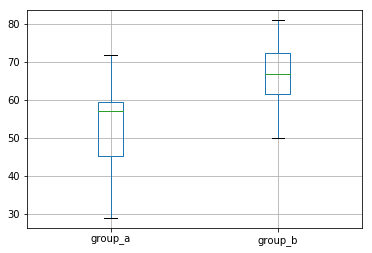

In [128]:
boxplot = df.boxplot(column=['group_a', 'group_b'])

In [4]:
l = [4,11,12,20,23,23,30,31,32,33,34,36,38,40,41,44,44,44,45,47,48,49,54,56]
len(x)

25

In [2]:
x=[23,45,23,44,34,56,54,12,11,44,44,31,4,30,20,49,38,48,38,40,36,41,33,47,32]
len(x)

25

In [5]:
print(sorted(x))

[4, 11, 12, 20, 23, 23, 30, 31, 32, 33, 34, 36, 38, 38, 40, 41, 44, 44, 44, 45, 47, 48, 49, 54, 56]


In [6]:
print(l)

[4, 11, 12, 20, 23, 23, 30, 31, 32, 33, 34, 36, 38, 40, 41, 44, 44, 44, 45, 47, 48, 49, 54, 56]
